# Exact solution of 2D Ising model
References:
* B. Kaufman, Phys. Rev. 76, 1232 (1949).
* A. E. Ferdinand and M. P. A. Fisher, Phys. Rev. 185, 832 (1969).
* Statistical Mechanics, Third Edition by R K Pathria and Paul D. Beale. (Ch 13.4)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [2]:
# parameters
J = 1
kB = 1
Tc = 2/np.log(1+np.sqrt(2))
Kc = np.log(1+np.sqrt(2))/2

### $c$ function and its derivatives
The $c$ function is defined as: (Eq 2.4, PRB 1969)
$$
  c_r =\cosh(2K)\coth(2K) - \cos\left(\frac{r \pi}{n}\right) 
  = \frac{\cosh(2K)^2}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right)
  = \sinh(2K) + \frac{1}{\sinh(2K)} - \cos\left(\frac{r \pi}{n}\right).
$$

The first and second deratives of $c_r$ are: (they are independent of $r$ so we can drop the subscript.)

$$
\DeclareMathOperator{\csch}{csch}
  c^\prime = c^\prime_r = \cosh(2K)[4-2\csch^2(2K)] = 2 \cosh(2K)\left(1-\frac{1}{\sinh(2K)^2}\right).
$$

$$
  c^{\prime\prime} = c^{\prime\prime}_r = 8\csch(2K)^3 \cosh(2K)^2+4(\sinh(2K)-\csch(2K))
  =  \frac{8\cosh(2K)^2}{\sinh(2K)^3} + 4\left( \sinh(2K) - \frac{1}{\sinh(2K)} \right).
$$

### $\gamma$ function and its derivatives
$\gamma$ and $c$ related by the equation $\cosh(\gamma_l)=c_l$, (Eq 2.4, PRB 1969) so that
$$ 
  \gamma_0 = 2K + \ln(\tanh(K)). 
$$
$$ 
  \gamma_r  =\text{arccosh}(c_r) = \ln \left( c_r + (c^2_r-1)^{1/2} \right), l \neq 0. 
$$
Note that there are sign ambituity. The equations above are the correct choices. 
For example one **should not** choose $\gamma_0 = \ln \left( c_0 + (c^2_0-1)^{1/2} \right)$. c.f. Fig3 of Phys. Rev. 76, 1232 (1949).

Note that $\gamma_l = \gamma_{2n-l}$ and for $0\le l\le n$ the function $\gamma_l$ is monotonically increasing in $l$.

The first deratives of $\gamma_r$ are:
$$ 
  \gamma^\prime_0 = 2 + \frac{1}{\tanh(K)} \frac{1}{\cosh^2(K)}
  = 2 + \frac{2}{\sinh(2K)}
  = 2 (1 + \frac{1}{\sinh(2K)}).
$$

$$
  \gamma^\prime_r = \frac{c^\prime_r}{\sqrt{c^2_r-1}} = c^\prime (c^2_r-1)^{-1/2}.
$$

The second deratives of $\gamma_r$ are:

$$
  \gamma_0^{\prime\prime} 
  = -4 \csch(2K) \coth(2K)
  = -4 \frac{\cosh{2K}}{\sinh(2K)^2}.
$$

$$
  \gamma_r^{\prime\prime} = \frac{c_r^{\prime\prime}}{\sqrt{c^2-1}} - \frac{ (c^\prime_r)^2 c_r }{ (c^2_r-1)^{3/2} }
  = c^{\prime\prime} (c^2_r-1)^{-1/2} - (c^\prime)^2 c_r (c^2_r-1)^{-3/2}
$$

### $Z_1, Z_2, Z_3, Z_4$
The canonical partition function reads:
$$
  Z(K) = \frac{1}{2} \left(2\sinh(2K)\right)^{mn/2} \left(Z_1(K) + Z_2(K) + Z_3(K) + Z_4(K)\right),
$$
where
$$ Z_1(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r+1}), \; Z_2(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r+1}), $$
$$ Z_3(K) = \prod_{r=0}^{n-1} 2\cosh(\frac{m}{2} \gamma_{2r1}), \; Z_4(K) = \prod_{r=0}^{n-1} 2\sinh(\frac{m}{2} \gamma_{2r1}). $$

Note that $Z_4$ changes sign at critical point. $Z_1, Z_2, Z_3$ are alwayas positive. 

### $\log(Z)$
The log of the partition function reads:
$$
  \ln Z=  \ln( \frac{1}{2} ) + \frac{mn}{2} \ln( 2\sinh(2K) ) + \ln\left(Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)\right),
$$
or the log of the partition function per site
$$
  \frac{\ln Z}{mn} = \frac{1}{mn} \ln( \frac{1}{2} ) + \frac{1}{2} \ln( 2\sinh(2K) ) 
  + \frac{1}{mn} \ln(Z_1(K))
  + \frac{1}{mn} \ln\left[ 1+ \frac{Z_2(K)}{Z_1(K)}+\frac{Z_3(K)}{Z_1(K)}+\frac{Z_4(K)}{Z_1(K)} \right].
$$

### $\frac{Z^\prime_1}{Z_1}, \frac{Z^\prime_2}{Z_2}, \frac{Z^\prime_3}{Z_3}, \frac{Z^\prime_4}{Z_4}$

$$ 
  \frac{Z^\prime_1}{Z_1} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right), \;
  \frac{Z^\prime_2}{Z_2} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right).
$$

$$
  \frac{Z^\prime_3}{Z_3} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right), \;
  \frac{Z^\prime_4}{Z_4} = \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right).
$$

### $\frac{Z^{\prime\prime}_1}{Z_1}, \frac{Z^{\prime\prime}_2}{Z_2}, \frac{Z^{\prime\prime}_3}{Z_3}, \frac{Z^{\prime\prime}_4}{Z_4}$

$$
  \frac{Z^{\prime\prime}_1}{Z_1} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r+1} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_2}{Z_2} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r+1} \coth\left( \frac{m}{2}\gamma_{2r+1} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r+1} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r+1} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_3}{Z_3} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \tanh\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \tanh\left( \frac{m}{2}\gamma_{2r} \right)
  + \frac{m}{2} \gamma^{\prime} \cosh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right],
$$

$$
  \frac{Z^{\prime\prime}_4}{Z_4} = 
  \left[ \frac{m}{2} \sum_{r=0}^{n-1} \gamma^\prime_{2r} \coth\left( \frac{m}{2}\gamma_{2r} \right) \right]^2
  + \frac{m}{2} \sum_{n=0}^{n-1} 
  \left[ \gamma^{\prime \prime} \coth\left( \frac{m}{2}\gamma_{2r} \right)
  - \frac{m}{2} \gamma^{\prime} \sinh^{-2}\left( \frac{m}{2}\gamma_{2r} \right) \right].
$$

## Energy per site
$$
  \frac{U_{nm}}{nm} = - \frac{1}{nm} J \frac{d}{dK} \ln Z_{nm}
  =-J \coth(2K) - \frac{J}{mn} \frac{Z_1^\prime(K)+Z_2^\prime(K)+Z_3^\prime(K)+Z_4^\prime(K)}{Z_1(K)+Z_2(K)+Z_3(K)+Z_4(K)}
  =-J \coth(2K) - \frac{J}{mn} 
  \frac{\frac{Z_1^\prime}{Z_1}+\frac{Z_2^\prime}{Z_2}\frac{Z_2}{Z_1}+\frac{Z_3^\prime}{Z_3}\frac{Z_3}{Z_1}+\frac{Z_4^\prime}{Z_4}\frac{Z_4}{Z_1}}
  {1+\frac{Z_2}{Z_1}+\frac{Z_2}{Z_1}+\frac{Z_3}{Z_1}+\frac{Z_4}{Z_1}}.
$$

## Specific heat pe site
$$
  \frac{C_{nm}}{nm} = \frac{1}{nm} K^2 \frac{d^2}{dK^2} \ln Z_{nm}
  = -\frac{2K^2}{\sinh(2K)^2} + \frac{K^2}{nm} 
  \left[ 
    \frac{Z^{\prime\prime}_1 + Z^{\prime\prime}_2 + Z^{\prime\prime}_3 + Z^{\prime\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}
    - 
    \left[\frac{Z^{\prime}_1 + Z^{\prime}_2 + Z^{\prime}_3 + Z^{\prime}_4}{Z_1 + Z_2 + Z_3 + Z_4}\right]^2
  \right]
$$

## Problem-1

Plot $\ln Z$, $\frac{E}{mn}$, $\frac{C}{mn}$ as a function of temperature $T$ for $m=n=2, 4, 8$, etc. What is the largest size you can reach without overflow?

![Alt text](FSS.png)

In [3]:
def c_0(K):
    return np.sinh(2*K) + 1/np.sinh(2*K) - 1

def e_c(n, K):
    c = np.zeros((2*n, K.size))
    for r in range(2*n):
        c[r, :] = np.sinh(2*K) + 1/np.sinh(2*K) - np.cos(np.pi*r/n)
    return c

def e_d_c(K):
    return 2*np.cosh(2*K)*(1-1/(np.sinh(2*K)**2))

def e_dd_c(K):
    return 8*(np.cosh(2*K)**2)/(np.sinh(2*K)**3) + 4*(np.sinh(2*K) - 1/np.sinh(2*K))



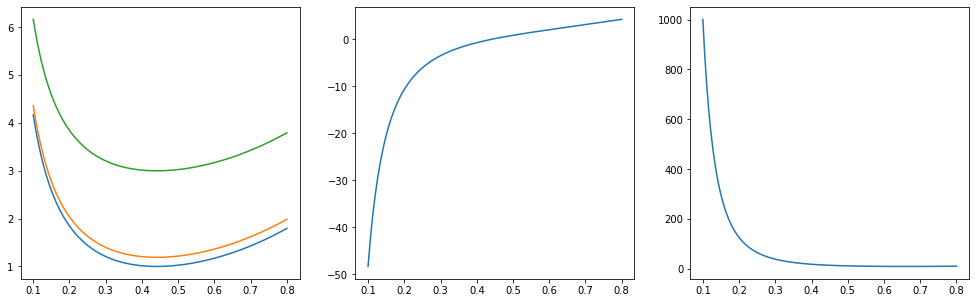

In [4]:
K = np.linspace(0.1, 0.8, 1000)

plt.figure(figsize=(17, 5))

n = 5
m = n

c0 = c_0(K)
c = e_c(n, K)
d_c = e_d_c(K)
dd_c = e_dd_c(K)

plt.subplot(131)

pylab.plot(K, c0)
pylab.plot(K, c[1])
pylab.plot(K, c[5])

plt.subplot(132)
pylab.plot(K, d_c) 

plt.subplot(133)
pylab.plot(K, dd_c) 
pylab.show()

In [5]:
def e_gamma(n, K):
    c = e_c(n, K)
    
    gamma = np.zeros((2*n, K.size))
    
    gamma[0, :] = 2*K + np.log(np.tanh(K))
    gamma[1:, :] = np.arccosh(c[1:, :])
    
          
    return gamma

def eval_d_gamma(n, K):
    c = e_c(n, K)
    d_c = e_d_c(K)
    dd_c = e_dd_c(K)
    
    dd_gamma = np.zeros((2*n, K.size))
    
    dd_gamma[0, :] = -4*np.cosh(2*K)/(np.sinh(2*K)**2)
    dd_gamma[1:, :] = dd_c[:] * (c[1:, :]**2-1)**(-1/2) -c[1:, :]*(d_c[:]**2) * (c[1:,:]**2-1)**(-3/2)
    
    return dd_gamma


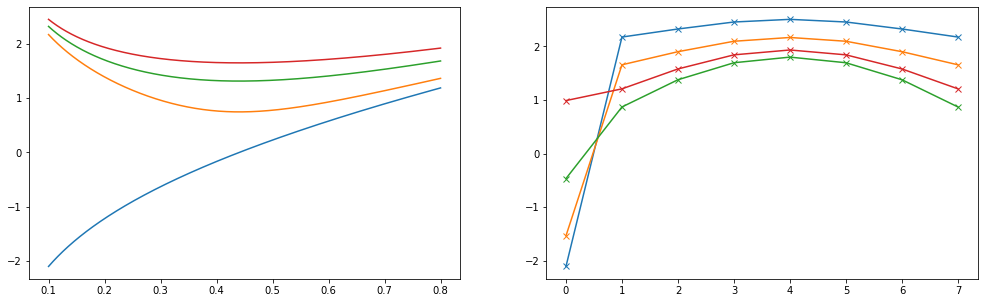

In [8]:
K = np.linspace(0.1, 0.8, 600)

plt.figure(figsize=(17, 5))

n = 4
m = n

gamma = e_gamma(n, K)

plt.subplot(121)

for i in range(n):
    pylab.plot(K, gamma[i])
    
plt.subplot(122)

pylab.plot(range(2*n), gamma[0:2*n, 0],'x-')
pylab.plot(range(2*n), gamma[0:2*n, 50],'x-')
pylab.plot(range(2*n), gamma[0:2*n, 200], 'x-')
pylab.plot(range(2*n), gamma[0:2*n, 540], 'x-')